In [1]:
#IMAGE PROCESSING

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
x_train = train_datagen.flow_from_directory(r"C:\Users\Raj\Desktop\SI-GuidedProject-78335-1656736746-main\data\train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r"C:\Users\Raj\Desktop\SI-GuidedProject-78335-1656736746-main\data\test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


In [6]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [7]:
#MODEL BUILDING

In [8]:
model = Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [10]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
model.add(Convolution2D(32,(3,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten()) # ANN Input...

In [14]:
#Adding Dense Layers

In [15]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [16]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [17]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [18]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [19]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [20]:
model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=15, validation_data=x_test,validation_steps = len(x_test))

C:\Users\Raj\AppData\Local\Temp\ipykernel_24704\2347427206.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=15, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/15
480/480 [==============================] - 70s 143ms/step - loss: 1.4441 - accuracy: 0.4781 - val_loss: 1.7592 - val_accuracy: 0.3193
Epoch 2/15
480/480 [==============================] - 51s 105ms/step - loss: 1.0058 - accuracy: 0.6048 - val_loss: 1.0609 - val_accuracy: 0.6746
Epoch 3/15
480/480 [==============================] - 51s 106ms/step - loss: 0.3512 - accuracy: 0.8806 - val_loss: 0.6332 - val_accuracy: 0.8344
Epoch 4/15
480/480 [==============================] - 50s 105ms/step - loss: 0.2024 - accuracy: 0.9384 - val_loss: 0.4524 - val_accuracy: 0.8501
Epoch 5/15
480/480 [==============================] - 51s 107ms/step - loss: 0.1530 - accuracy: 0.9535 - val_loss: 0.6155 - val_accuracy: 0.8350
Epoch 6/15
480/480 [==============================] - 51s 107ms/step - loss: 0.1207 - accuracy: 0.9633 - val_loss: 0.6887 - val_accuracy: 0.8418
Epoch 7/15
480/480 [==============================] - 51s 107ms/step - loss: 0.1103 - accuracy: 0.9669 - val_loss: 0.6511 - val_ac

In [25]:
#Saving Model.
model.save('ECG.h5')

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('ECG.h5')

In [28]:
img=image.load_img(r"C:\Users\Raj\Desktop\SI-GuidedProject-78335-1656736746-main\training/Unknown_image.png",target_size=(64,64))

In [29]:
x=image.img_to_array(img)

In [30]:
import numpy as np

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred

1/1 [==============================] - 0s 143ms/step


1

In [33]:
index=['left Bundle Branch block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation']
result = str(index[y_pred])
result

'Normal'

In [34]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
# Defining list with labels
labels = ['Left Bundle Block', 'Normal', 'Premature Contraction', 'Premature Contractions', 'Right Branch Block','Ventricular Fibrillation']

print(labels)

['Left Bundle Block', 'Normal', 'Premature Contraction', 'Premature Contractions', 'Right Branch Block', 'Ventricular Fibrillation']


In [36]:

y_true = np.random.randint(low=0, high=5, size=100, dtype=int)


# Check point
# Shwoing array
print(y_true)

[2 2 2 2 4 4 1 0 4 0 3 2 4 4 2 4 2 3 2 2 0 2 3 4 4 0 2 3 1 2 3 3 3 1 1 1 0
 2 0 0 1 3 4 1 0 3 2 4 4 1 3 2 4 4 1 1 4 0 0 3 0 0 1 4 1 1 0 3 3 1 2 4 4 3
 3 0 2 3 2 0 4 1 4 4 2 0 1 1 4 0 4 1 4 4 4 4 3 3 2 1]


In [37]:

classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)


# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4]


classes frequency: [17 19 20 18 26]


In [38]:
# Making copy of array with True classes' indexes
y_predicted = np.copy(y_true)

In [39]:
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)


# Check point
# Showing chosen indexes
print(ii)

[50 81 92 51 87 84 82 60 89 35 61 10 87  1 49 67 93 89 45 52 31 46 32 62
 54]


In [40]:
for i in ii:
    # Generating new class index
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)
    
    
    # Check point
    # Showing difference between True classes' indexes and Predicted ones
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

index = 50, True class => 3, 3 <= Predicted class
index = 81, True class => 1, 3 <= Predicted class
index = 92, True class => 4, 4 <= Predicted class
index = 51, True class => 2, 0 <= Predicted class
index = 87, True class => 1, 4 <= Predicted class
index = 84, True class => 2, 4 <= Predicted class
index = 82, True class => 4, 4 <= Predicted class
index = 60, True class => 0, 1 <= Predicted class
index = 89, True class => 0, 1 <= Predicted class
index = 35, True class => 1, 0 <= Predicted class
index = 61, True class => 0, 2 <= Predicted class
index = 10, True class => 3, 1 <= Predicted class
index = 87, True class => 1, 1 <= Predicted class
index =  1, True class => 2, 4 <= Predicted class
index = 49, True class => 1, 0 <= Predicted class
index = 67, True class => 3, 0 <= Predicted class
index = 93, True class => 4, 2 <= Predicted class
index = 89, True class => 0, 4 <= Predicted class
index = 45, True class => 3, 4 <= Predicted class
index = 52, True class => 4, 2 <= Predicted class


In [41]:
# Computing Confusion Matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_true, y_predicted)

# Showing Confusion Matrix in form of 2D Numpy array
print(c_m)

[[14  1  1  0  1]
 [ 2 16  0  1  0]
 [ 2  0 16  0  2]
 [ 2  1  0 13  2]
 [ 0  0  2  0 24]]


In [42]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.figure(figsize=(30, 30))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


NameError: name 'itertools' is not defined

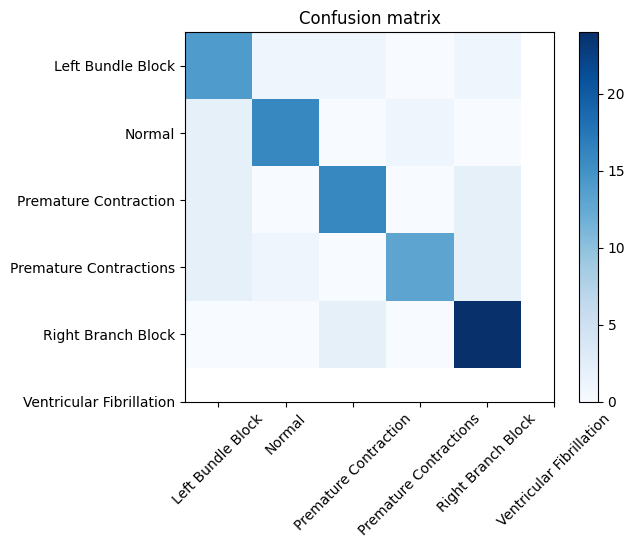

<Figure size 3000x3000 with 0 Axes>

In [43]:
plot_confusion_matrix(c_m,labels)

In [51]:
import numpy as np
true_pos = np.diag(c_m)
false_pos = np.sum(c_m, axis=0) - true_pos
false_neg = np.sum(c_m, axis=1) - true_pos


precision = np.sum(true_pos / (true_pos + false_pos))
recall = np.sum(true_pos / (true_pos + false_neg))

true_pos = np.diag(c_m)

print(precision)
print(recall)
print(true_pos)


4.187151787514764
4.110933820221746
[14 16 16 13 24]
